I have ESRB's data for 2016 and I'm going to identify patterns and determine whether a game succeeds or not, which will then help plan out marketing strategies for 2017. I will then recommend a plan to move forward in 2017 depending on the data I have filtered through.

The first thing I will do is download the necessary libraries and do a general study of the available information and determine where to go from there.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
#get dataset
df = pd.read_csv('/datasets/games.csv')

In [3]:
#take initial look at data
df.info()
print('\n')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701

As shown above, I have displayed the columns, the number of items in the columns, and the data types associated with those columns. I've also shown the number of missing items in several columns. Now, I will begin cleaning up the data to make it easier to work with. I can begin by making the columns all lowercase.

In [4]:
#convert everything to lowercase
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Now we can change some datatypes. We'll change the 'year_of_release column into an integer data type, since years don't require decimals. After that, we'll check if any other columns don't require decimals and then convert them to integers, as well as seeing if any other column's datatypes need to be adjusted.

In [5]:
#look at years and change to int
display(df['year_of_release'].head())
df['year_of_release'] = df['year_of_release'].astype('Int64', errors='ignore')
display(df['year_of_release'].head())
df.info()

0    2006.0
1    1985.0
2    2008.0
3    2009.0
4    1996.0
Name: year_of_release, dtype: float64

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: Int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


The 'critic_score' column deals with whole numbers, so the float data type isn't necessary here.

In [6]:
#look at critic score and change to int
display(df['critic_score'].sample(5))
df['critic_score'] = df['critic_score'].astype('Int64', errors='ignore')
display(df['critic_score'].sample(5))

13093    53.0
6591      NaN
15358    67.0
644      82.0
9285      NaN
Name: critic_score, dtype: float64

353        82
14347    <NA>
7715     <NA>
2673     <NA>
6844     <NA>
Name: critic_score, dtype: Int64

I decided to change the 'year_of_release' and 'critic_score' data types because neither one of those columns needed a decimal. Years don't end in a decimal, and the critic scores were all whole numbers. 
Now we'll go through the 'user_score' column. It should be converted to floats, but it has tbd spread throughout it. We'll remove all the tbd's and convert the column into floats. 
I decided to remove the tbd's completely because they don't provide any significant value other than determining how many games have that label.

In [7]:
#look at user score and change to floats
print(df['user_score'].sample(5))
#get rid of tbd since it doesn't provide any value to the column and replace with nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
print(df['user_score'].sample(5))

2953     NaN
3896     7.5
8793     7.5
6756     6.3
15846    NaN
Name: user_score, dtype: object
10585    NaN
8432     NaN
5934     7.3
11340    7.7
12775    NaN
Name: user_score, dtype: float64


In [8]:
display(df['name'].head(10))

0                   Wii Sports
1            Super Mario Bros.
2               Mario Kart Wii
3            Wii Sports Resort
4     Pokemon Red/Pokemon Blue
5                       Tetris
6        New Super Mario Bros.
7                     Wii Play
8    New Super Mario Bros. Wii
9                    Duck Hunt
Name: name, dtype: object

Below, I created a 'total_sales' column to add up all the sales for each game in each area and place the total amount in the column.

In [9]:
#add up all the sales and create a new column for the result
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
print(df['total_sales'].head())
df.info()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB


In [10]:
df.duplicated().sum()

0

What I have done so far is import the necessary libraries that I believe I will be using during the whole analysis. I've looked through the data, changed any data types that needed to be changed, removed any unnecessary pieces of data, and checked for duplicates. I didn't remove any duplicates since these are not unique inputs, but rather common games that multiple people around the world would buy, therefor causing a duplicate in the data.
Next, I'll look at the amount of games sold each year from 1980-2016.

I'll count how many games are sold each year and sort it by the index value so the years are in chronological order.

In [11]:
df['year_of_release'].value_counts().sort_index()

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

Based on the amount of games sold here, I would say that not each year is of much significance, but looking at each decade holds a lot more significance. 
Now, I will get the total sales for each gaming platform.

In [12]:
total_platform_sales = df.groupby('platform')['total_sales'].sum()
print(total_platform_sales)

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64


Above shows the total sales for each platform and it's easy to see which platforms were very successful and which were not.

Below shows a bar graph displaying the total sales by the most purchased platform each year.

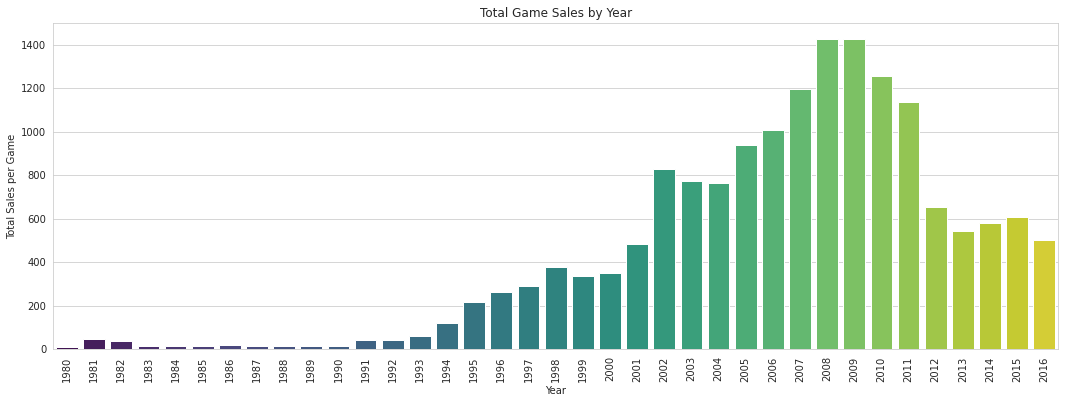

In [13]:
#group data
games_sales = df.groupby('year_of_release').size().reset_index(name='Number of games sold')

sns.set_style('whitegrid')
plt.figure(figsize=(18, 6))
sns.barplot(data=games_sales, x='year_of_release', y='Number of games sold', palette='viridis')
plt.title('Total Game Sales by Year')
plt.ylabel('Total Sales per Game')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

To help build a prognosis for 2017, the data that I will be using is the data from 2006-2016 since these reflect the more modern consoles and games being sold.

Platforms leading in sales for 2006-2016:
platform
X360    952.99
PS3     931.34
Wii     891.18
DS      655.35
PS4     314.14
PS2     265.80
3DS     257.81
PSP     238.63
PC      163.42
XOne    159.32
WiiU     82.19
PSV      53.81
GC       11.53
XB       10.77
GBA       8.68
DC        0.06
Name: total_sales, dtype: float64


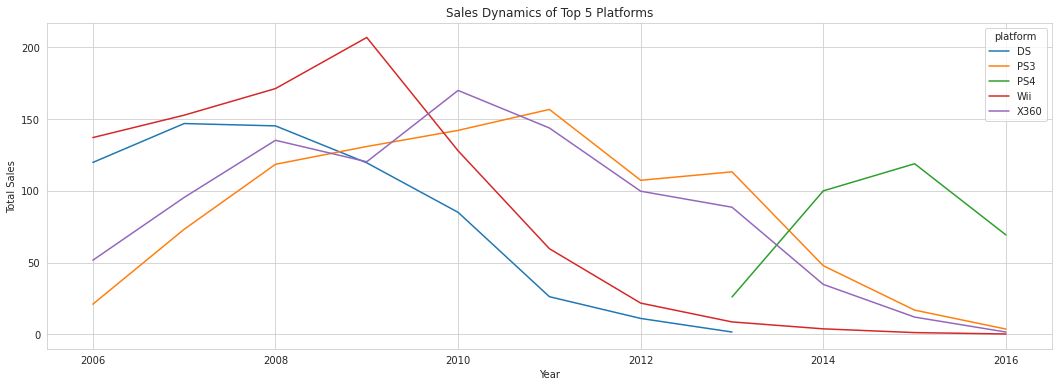

In [14]:
#filter df to show only years 2006 - 2016
decade_df = df[(df['year_of_release'] >= 2006) & (df['year_of_release'] <= 2016)]
#use filtered df to find total sales for the decade
platform_sales = decade_df.groupby('platform')['total_sales'].sum()
#sort data from highest to lowest
platform_sales_sorted = platform_sales.sort_values(ascending=False)

print('Platforms leading in sales for 2006-2016:')
print(platform_sales_sorted)

top_5_platforms = decade_df.groupby('platform')['total_sales'].sum().nlargest(5).index
filtered_top_5 = decade_df[decade_df['platform'].isin(top_5_platforms)]
platform_sales_by_year = filtered_top_5.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

sns.set_style('whitegrid')
plt.figure(figsize=(18, 6))
platform_sales_by_year.plot(kind='line', ax=plt.gca())
plt.title('Sales Dynamics of Top 5 Platforms')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.show()

With this table, we can see that the Xbox 360 and Playstation 3 are leading in sales for this specific decade. That is the case because they were the best consoles for that period. But we can see that the Playstation 4 and Xbox One, the newer generation of those companies' consoles, are on the list. If we alter the table to show the last 3 years instead of the entire decade, it will show us what consoles are rising and falling by comparison.

Platforms leading in sales for 2013-2016:
platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


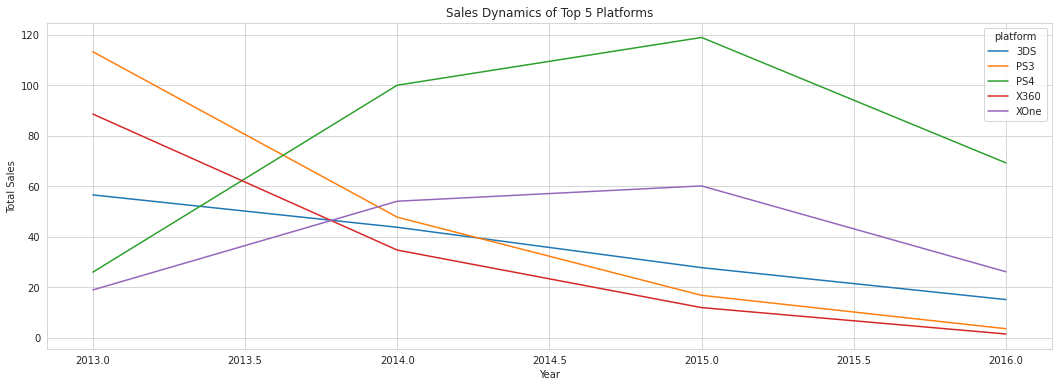

In [15]:
#filter to show only 2013-2016
three_years_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <=2016)]
#filter data to show total sales for those 3 years
platform_sales1 = three_years_df.groupby('platform')['total_sales'].sum()
#filter data from highest to lowest
platform_sales_sorted1 = platform_sales1.sort_values(ascending=False)

print('Platforms leading in sales for 2013-2016:')
print(platform_sales_sorted1)

top5_platforms = three_years_df.groupby('platform')['total_sales'].sum().nlargest(5).index
filtered_top5 = three_years_df[three_years_df['platform'].isin(top5_platforms)]
platform_sales_per_year = filtered_top5.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

sns.set_style('whitegrid')
plt.figure(figsize=(18, 6))
platform_sales_per_year.plot(kind='line', ax=plt.gca())
plt.title('Sales Dynamics of Top 5 Platforms')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.show()

As we can tell from comparing the two tables, the Playstation 4 is leading the sales into the later half of the 2010-2020 decade. The Playstation 3 is still holding on with sales leading above Xbox One for the 2013-2016 timeline, but may decrease if we shorten it to a 2 year difference.
We can also see that some consoles have stopped selling completely and aren't even on the list anymore. These include DC, GBA, XB, GC, and the PS2.

In [16]:
df_actual = df.query('year_of_release >= 2013')

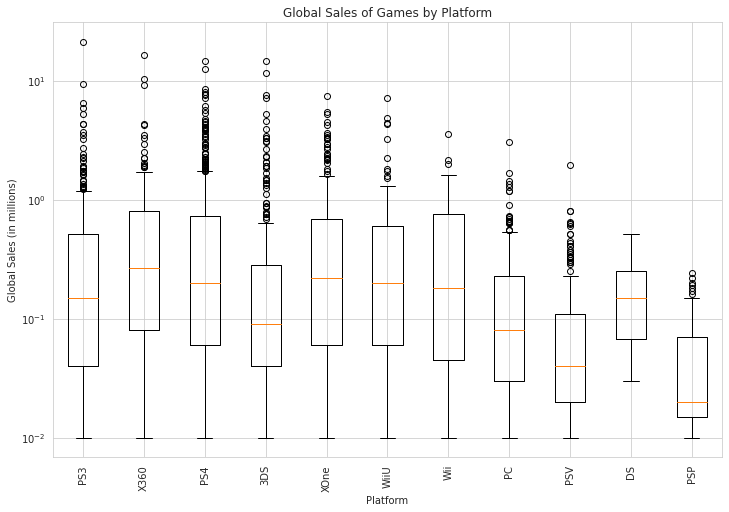

In [17]:
#filter df to platforms and sales
filtered_df = df_actual[['platform', 'total_sales']]

#plot box graph
plt.figure(figsize=(12, 8))
plt.boxplot([filtered_df[filtered_df['platform'] == platform]['total_sales'] for platform in filtered_df['platform'].unique()],
            labels=filtered_df['platform'].unique())
plt.yscale('log')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.title('Global Sales of Games by Platform')
plt.xticks(rotation=90)
plt.show()

The difference of sales are mostly pretty close together, with a few consoles doing better and a few doing worse. All but 1 consoles have outliers that are plotted in the graph. There are significant differences in most sales, with the exception of Xbox's and Playstation's consoles being about even across the board.

Next, we'll look at how the user reviews and professional reviews affected the sales of the most popular of the consoles, the Playstation 2. 

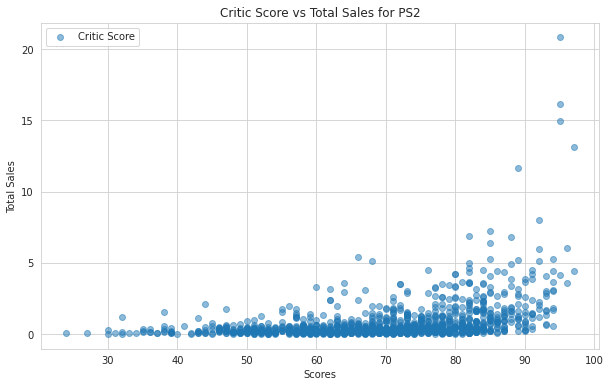

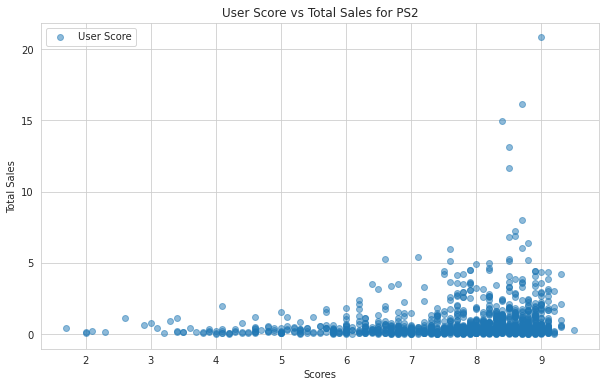

Pearson correlation (Critic Score vs Total Sales): 0.3892195999178934
Pearson correlation (User Score vs Total Sales): 0.16941987448591256


In [18]:
#drop any NaNs within the columns chosen
df.dropna(subset=['user_score', 'critic_score'], inplace=True)

#select just the PS2
ps2_data = df[df['platform'] == 'PS2']

#create scatterplot displaying critic score / total sales
plt.figure(figsize=(10, 6))
plt.scatter(ps2_data['critic_score'], ps2_data['total_sales'], alpha=0.5, label='Critic Score')
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('Critic Score vs Total Sales for PS2')
plt.legend()
plt.show()

#create scatterplot displaying user score / total sales
plt.figure(figsize=(10, 6))
plt.scatter(ps2_data['user_score'], ps2_data['total_sales'], alpha=0.5, label='User Score')
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('User Score vs Total Sales for PS2')
plt.legend()
plt.show()

critic_corr, _ = pearsonr(ps2_data['critic_score'], ps2_data['total_sales'])
user_corr, _ = pearsonr(ps2_data['user_score'], ps2_data['total_sales'])

print('Pearson correlation (Critic Score vs Total Sales):', critic_corr)
print('Pearson correlation (User Score vs Total Sales):', user_corr)

Looking at the scatterplots, its a clear correlation that the higher the critic score and user score, the more sales the game has. Next, I'll look at the PS4 and PS3 data to see if a higher critic score and user score correlate to more game sales.

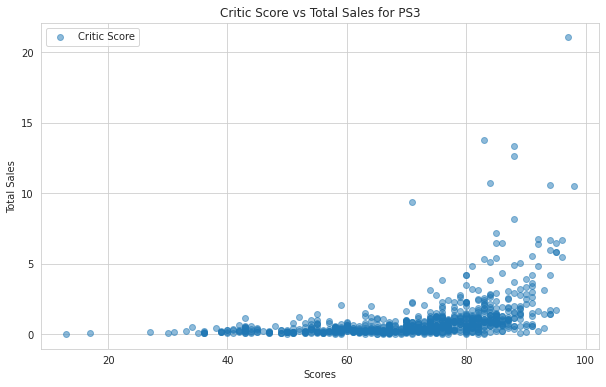

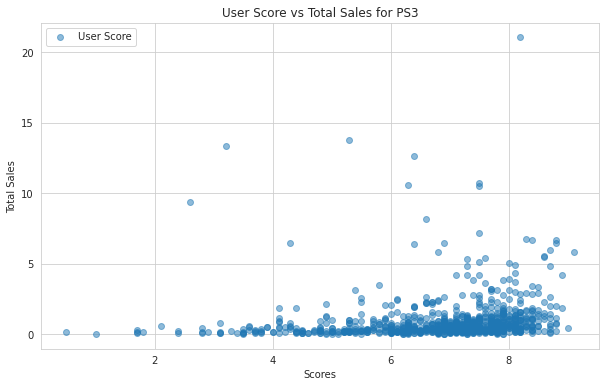

Pearson correlation (Critic Score vs Total Sales): 0.4278750023491295
Pearson correlation (User Score vs Total Sales): 0.14325197544851798


In [19]:
#select just PS3 console
ps3_data = df[df['platform'] == 'PS3']

#create scatterplot displaying critic score / total sales
plt.figure(figsize=(10, 6))
plt.scatter(ps3_data['critic_score'], ps3_data['total_sales'], alpha=0.5, label='Critic Score')
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('Critic Score vs Total Sales for PS3')
plt.legend()
plt.show()

#create scatterplot displaying user score / total sales
plt.figure(figsize=(10, 6))
plt.scatter(ps3_data['user_score'], ps3_data['total_sales'], alpha=0.5, label='User Score')
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('User Score vs Total Sales for PS3')
plt.legend()
plt.show()

critic_corr, _ = pearsonr(ps3_data['critic_score'], ps3_data['total_sales'])
user_corr, _ = pearsonr(ps3_data['user_score'], ps3_data['total_sales'])

print('Pearson correlation (Critic Score vs Total Sales):', critic_corr)
print('Pearson correlation (User Score vs Total Sales):', user_corr)

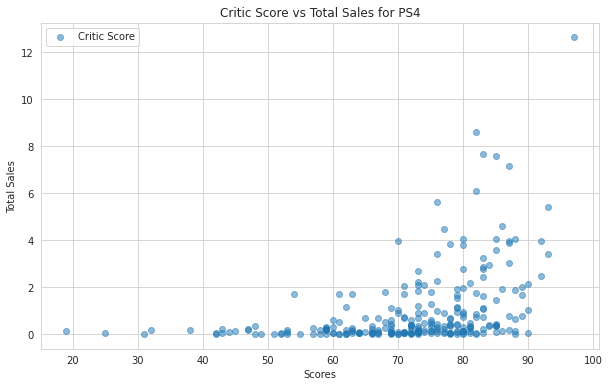

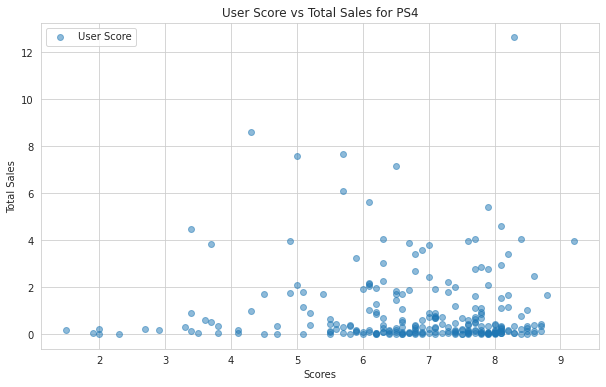

Pearson correlation (Critic Score vs Total Sales): 0.4058948014583664
Pearson correlation (User Score vs Total Sales): -0.033624975965288795


In [20]:
#select only PS4 console
ps4_data = df[df['platform'] == 'PS4']

#create scatterplot displaying critic score / total sales
plt.figure(figsize=(10, 6))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.5, label='Critic Score')
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('Critic Score vs Total Sales for PS4')
plt.legend()
plt.show()

#create scatterplot displaying user score / total sales
plt.figure(figsize=(10, 6))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5, label='User Score')
plt.xlabel('Scores')
plt.ylabel('Total Sales')
plt.title('User Score vs Total Sales for PS4')
plt.legend()
plt.show()

critic_corr, _ = pearsonr(ps4_data['critic_score'], ps4_data['total_sales'])
user_corr, _ = pearsonr(ps4_data['user_score'], ps4_data['total_sales'])

print('Pearson correlation (Critic Score vs Total Sales):', critic_corr)
print('Pearson correlation (User Score vs Total Sales):', user_corr)

For the PS3 and PS4, theres still a positive correlation between higher critic scores and more game sales. However, while there is still a positive correlation between higher user scores and more game sales for both of these consoles, it isn't as definitive as the critic score / total sales scatterplots. 

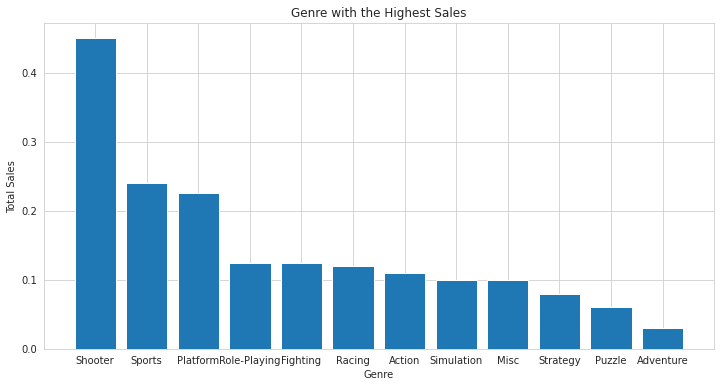

In [21]:
#filter genre by total sales
genre_df = df_actual.groupby('genre')['total_sales'].median().reset_index()
#sort values from highest to lowest
genre_df = genre_df.sort_values(by='total_sales', ascending=False)

#plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(genre_df['genre'], genre_df['total_sales'])
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Genre with the Highest Sales')
plt.show()

Based on the bar graph above, we can see the sales of certain genres from the highest amount of sales to the lowest amount of sales. From this bar graph, the more profitable genres from 2013-2016 appear to be shooter and sports games, with puzzle and adventure games coming in last.

Now I will create a user profile for each region: North America (NA), Europe (EU), and Japan (JP). To do this, I will go by the sales in each region.

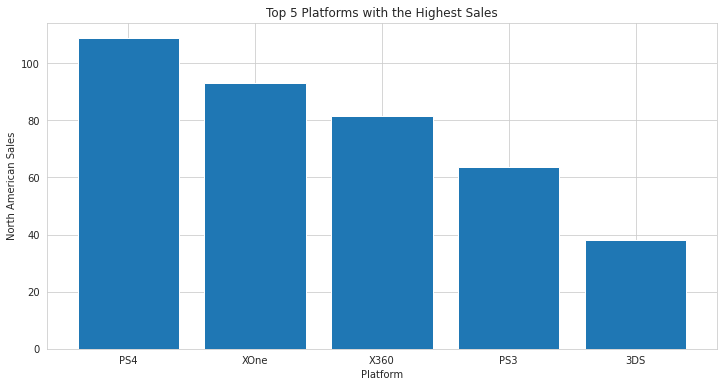

In [22]:
#group the platforms by only NA sales
na_platforms = df_actual.groupby('platform')['na_sales'].sum().reset_index()

#sort the values in descending order and only show the top 5
na_platforms = na_platforms.sort_values(by='na_sales', ascending=False).head(5)

#plot a bar graph
plt.figure(figsize=(12, 6))
plt.bar(na_platforms['platform'], na_platforms['na_sales'])
plt.xlabel('Platform')
plt.ylabel('North American Sales')
plt.title('Top 5 Platforms with the Highest Sales')
plt.show()

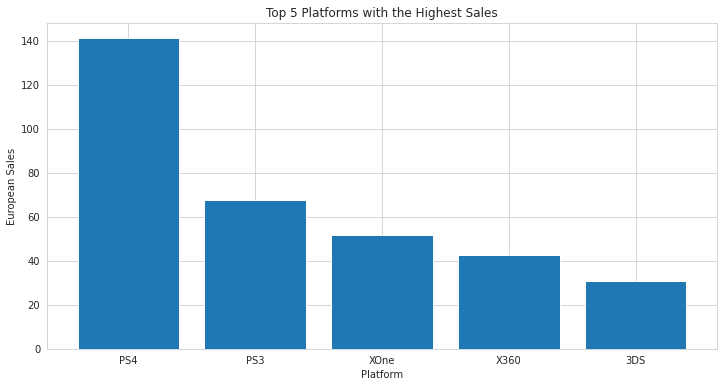

In [23]:
#group the platforms by only EU sales
eu_platforms = df_actual.groupby('platform')['eu_sales'].sum().reset_index()

#sort the values in descending order and only show the top 5
eu_platforms = eu_platforms.sort_values(by='eu_sales', ascending=False).head(5)

#plot a bar graph
plt.figure(figsize=(12, 6))
plt.bar(eu_platforms['platform'], eu_platforms['eu_sales'])
plt.xlabel('Platform')
plt.ylabel('European Sales')
plt.title('Top 5 Platforms with the Highest Sales')
plt.show()

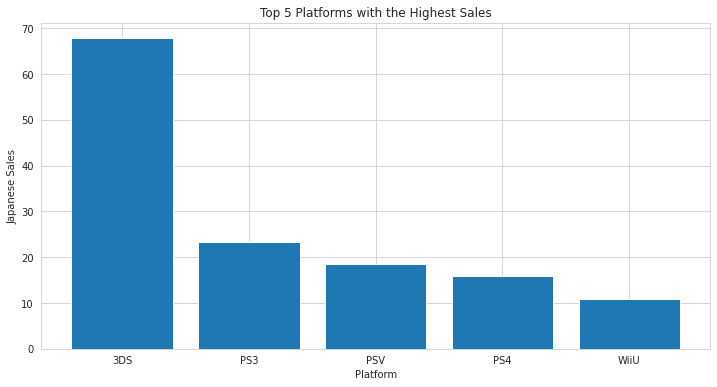

In [24]:
#group the platforms by only JP sales
jp_platforms = df_actual.groupby('platform')['jp_sales'].sum().reset_index()

#sort the values in descending order and only show the top 5
jp_platforms = jp_platforms.sort_values(by='jp_sales', ascending=False).head(5)

#plot a bar graph
plt.figure(figsize=(12, 6))
plt.bar(jp_platforms['platform'], jp_platforms['jp_sales'])
plt.xlabel('Platform')
plt.ylabel('Japanese Sales')
plt.title('Top 5 Platforms with the Highest Sales')
plt.show()

Above, I have plotted a bar graph for each region showing the platforms with the highest amount of sales. The biggest and most obvious observation is that with each region, the Japanese companies Nintendo and Sony dominate the sales in each region, with each region having at least 3 consoles from those companies in the top 5. The PS4 is the top seller in NA and EU, and the 3DS is the top seller in JP.  

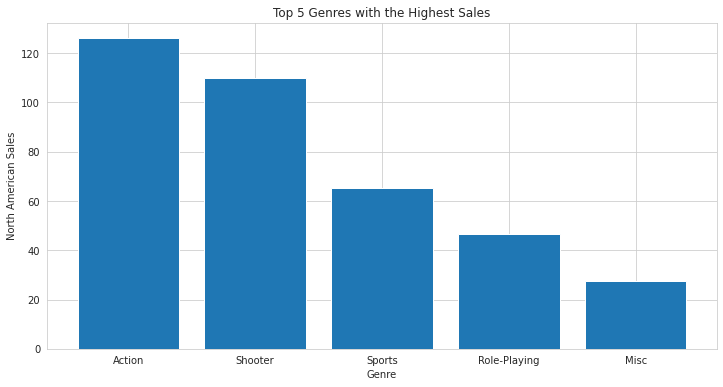

In [25]:
#group the genres by only NA sales
na_genres = df_actual.groupby('genre')['na_sales'].sum().reset_index()

#sort the values in descending order and only show the top 5
na_genres = na_genres.sort_values(by='na_sales', ascending=False).head(5)

#plot a bar graph
plt.figure(figsize=(12, 6))
plt.bar(na_genres['genre'], na_genres['na_sales'])
plt.xlabel('Genre')
plt.ylabel('North American Sales')
plt.title('Top 5 Genres with the Highest Sales')
plt.show()

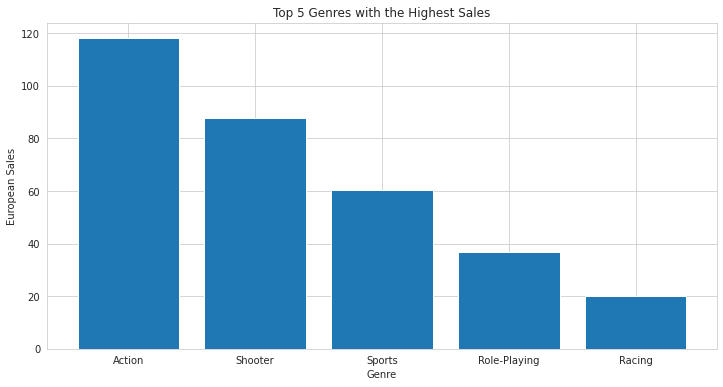

In [26]:
#group the genres by only EU sales
eu_genres = df_actual.groupby('genre')['eu_sales'].sum().reset_index()

#sort the values in descending order and only show the top 5
eu_genres = eu_genres.sort_values(by='eu_sales', ascending=False).head(5)

#plot a bar graph
plt.figure(figsize=(12, 6))
plt.bar(eu_genres['genre'], eu_genres['eu_sales'])
plt.xlabel('Genre')
plt.ylabel('European Sales')
plt.title('Top 5 Genres with the Highest Sales')
plt.show()

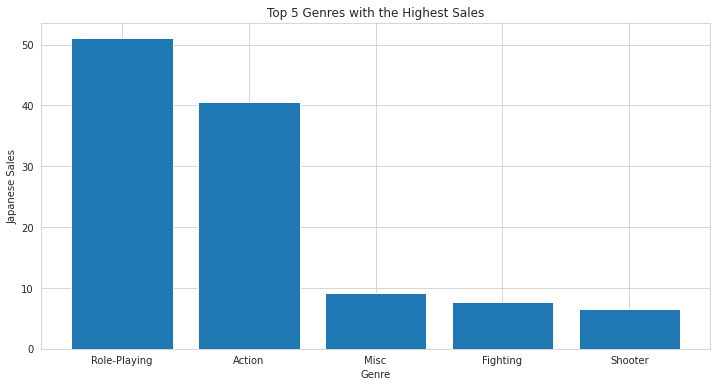

In [27]:
#group the genres by only JP sales
jp_genres = df_actual.groupby('genre')['jp_sales'].sum().reset_index()

#sort the values in descending order and only show the top 5
jp_genres = jp_genres.sort_values(by='jp_sales', ascending=False).head(5)

#plot a bar graph
plt.figure(figsize=(12, 6))
plt.bar(jp_genres['genre'], jp_genres['jp_sales'])
plt.xlabel('Genre')
plt.ylabel('Japanese Sales')
plt.title('Top 5 Genres with the Highest Sales')
plt.show()

With the above graphs, we can see that North America and Europe are almost identical in their preferences with genres. Both regions prefer the same genre of games until the 5th genre, where North America prefers the miscellaneous genre, and Europe prefers the racing genre. However, Japan genre rankings are very different. Role-playing comes in 1st, then action, miscellaneous, fighting, then shooters.

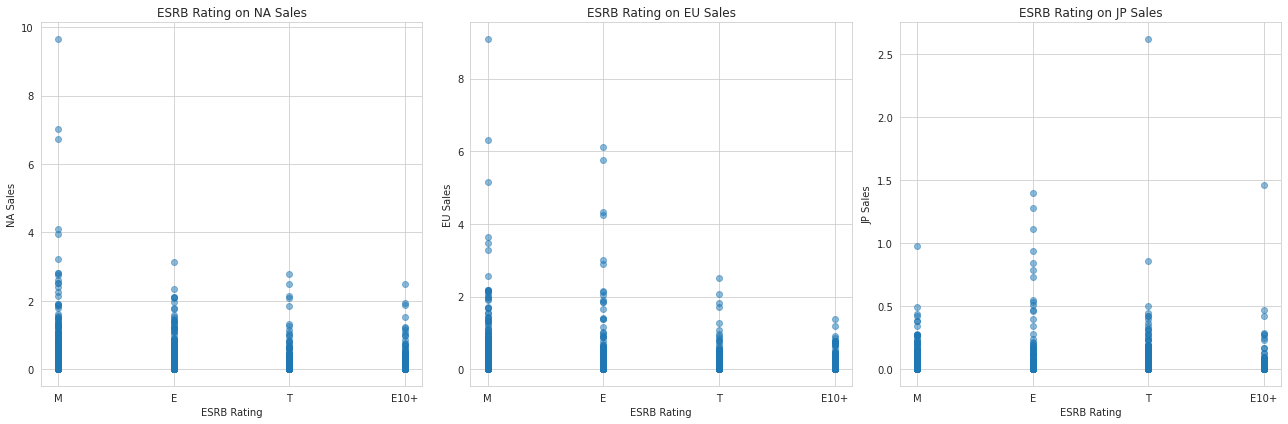

In [28]:
regions_df = df_actual.dropna(subset=['rating', 'na_sales', 'eu_sales', 'jp_sales'])

#create subplots for each region
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#plot NA sales vs critic score on axes 0
axes[0].scatter(regions_df['rating'], regions_df['na_sales'], alpha=0.5)
axes[0].set_xlabel('ESRB Rating')
axes[0].set_ylabel('NA Sales')
axes[0].set_title('ESRB Rating on NA Sales')

#plot EU sales vs critic score on axes 1
axes[1].scatter(regions_df['rating'], regions_df['eu_sales'], alpha=0.5)
axes[1].set_xlabel('ESRB Rating')
axes[1].set_ylabel('EU Sales')
axes[1].set_title('ESRB Rating on EU Sales')

#plot JP sales vs critic score on axes 2
axes[2].scatter(regions_df['rating'], regions_df['jp_sales'], alpha=0.5)
axes[2].set_xlabel('ESRB Rating')
axes[2].set_ylabel('JP Sales')
axes[2].set_title('ESRB Rating on JP Sales')

plt.tight_layout()
plt.show()

From the scatter plots, it would seem the best sellers in the NA and EU regions are games with a rating of M, and the rating E is a close second. For the JP region, E rated games are the best sellers with T rated games coming in second. If a company was trying to make the most amount of money they could from a game, those would be the ratings that the company should aim for.

Now I'll test two hypotheses. The first being that the average user ratings of the Xbox One and PC platforms are the same and the second being that the average user ratings for the Action and Sport genres are different.

For the first hypothesis: The null hypothesis will be that the average user ratings of the Xbox One and PC are the same. The alternative hypothesis will be the average user ratings are different.

For the second hypothesis: The null hypothesis will be that the average user ratings of the Action and Sport genres are different. The alternative hypothesis will be the average user ratings are the same.

The alpha threshold value for both hypotheses will be 5%. I chose this threshold because it is a very common measurement of statistical significance. 

I decided on the null hypotheses and the alternative hypotheses based on the given guidelines. The null hypothesis for both scenarios is to prove that the statement is correct, and the alternative hypothesis for both scenarios contradicts each null hypothesis.

In [29]:
#filter df to get just the ratings for xbox one and pc
xbox_ratings = df_actual[(df_actual['platform'] == 'XOne') & (~df_actual['user_score'].isna())]['user_score']
pc_ratings = df_actual[(df_actual['platform'] == 'PC') & (~df_actual['user_score'].isna())]['user_score']

#set significance level
alpha = 0.05

#calculate p-value
results_platform = st.ttest_ind(xbox_ratings, pc_ratings)
print('p-value: ', results_platform.pvalue)

if results_platform.pvalue < alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value:  0.14012658403611647
We can't reject the null hypothesis.


We can't reject the null hypothesis. There isn't enough evidence to suggest that the average user ratings for Xbox One and PC platforms are significantly different.

In [30]:
#filter df to get the ratings for action and sports games
action_ratings = df_actual[(df_actual['genre'] == 'Action') & (~df_actual['user_score'].isna())]['user_score']
sports_ratings = df_actual[(df_actual['genre'] == 'Sports') & (~df_actual['user_score'].isna())]['user_score']

#set significance level
alpha = 0.05

#calculate p-value
results_genre = st.ttest_ind(action_ratings, sports_ratings, equal_var = False)
print('p-value: ', results_genre.pvalue)

if results_genre.pvalue > alpha:
    print("We reject the null hypothesis.")
else:
    print("We can't reject the null hypothesis.")

p-value:  1.4460039700704315e-20
We can't reject the null hypothesis.


We reject the null hypothesis. There is strong evidence that the average user ratings for Action and Sports ratings are significantly different.

In order to design an effective advertising campaign targeting high-selling games, Ice should focus on specific platforms and genres based on regional preferences observed in the data from 2013 to 2016.

1.) Target Platforms:
- North America and Europe: PS4 and Xbox One are the primary platforms for potential success.
- Japan: Focus on the 3DS platform to reach a broader audience.

2.) Preferred Genres:
- North America and Europe: Action, Shooter, and Sports genres have demonstrated the highest sales.
- Japan: Prioritize Action, Role-Playing, and Shooter genres for a successful campaign.

3.) Age Ratings:
- North America and Europe: M-rated games have shown the highest sales and should be a significant focus.
- Japan: E-rated games are more popular and should be emphasized.

With these insights, Ice can effectively strategize and plan advertising campaigns to reach the target audience for each region while maximizing potential profits.